Conjunto de Entrenamiento:
Error Cuadrático Medio (MSE): 9.00
Raíz del Error Cuadrático Medio (RMSE): 3.00
Coeficiente de Determinación (R²): 0.94

Conjunto de Prueba:
Error Cuadrático Medio (MSE): 14.88
Raíz del Error Cuadrático Medio (RMSE): 3.86
Coeficiente de Determinación (R²): 0.84


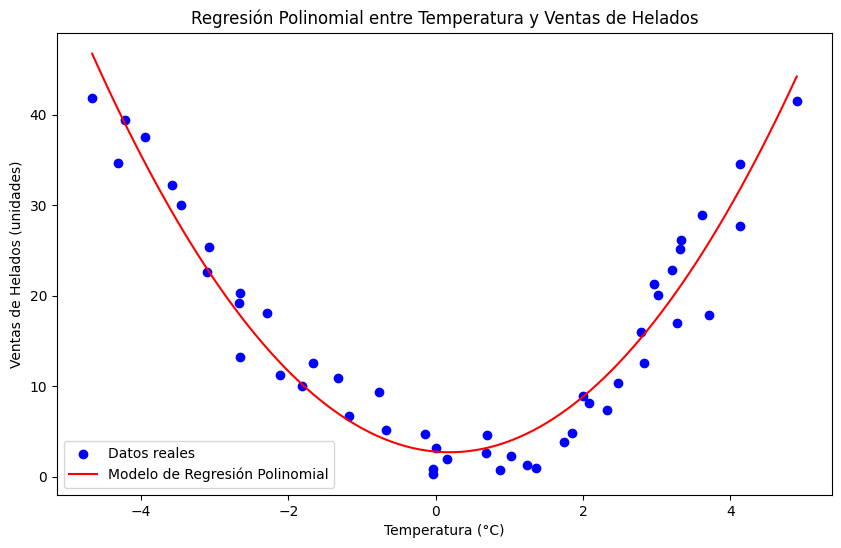

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = 'ice.csv'
data = pd.read_csv(url)

X = data[['Temperature (°C)']].values  # Variable independiente
Y = data['Ice Cream Sales (units)'].values  # Variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear transformación polinomial de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Predicciones
Y_train_pred = model.predict(X_train_poly)
Y_test_pred = model.predict(X_test_poly)

# Evaluación del modelo
mse_train = mean_squared_error(Y_train, Y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(Y_train, Y_train_pred)

mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(Y_test, Y_test_pred)

print('Conjunto de Entrenamiento:')
print(f'Error Cuadrático Medio (MSE): {mse_train:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_train:.2f}')
print(f'Coeficiente de Determinación (R²): {r2_train:.2f}')

print('\nConjunto de Prueba:')
print(f'Error Cuadrático Medio (MSE): {mse_test:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse_test:.2f}')
print(f'Coeficiente de Determinación (R²): {r2_test:.2f}')

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Datos reales')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
plt.plot(X_range, model.predict(X_range_poly), color='red', label='Modelo de Regresión Polinomial')
plt.title('Regresión Polinomial entre Temperatura y Ventas de Helados')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Ventas de Helados (unidades)')
plt.legend()
plt.show()
